# Laboratorio 5 - Autocodificadores 

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
# from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.legacy import SGD #para uso con procesadores M! y M2

In [176]:
df = pd.read_csv('UK_foods.csv', encoding='UTF-8')
df

,Food,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh_potatoes,720,874,566,1033
7,Fresh_Veg,253,265,171,143
8,Other_Veg,488,570,418,355
9,Processed_potatoes,198,203,220,187


Estadísticas descriptivas

In [177]:
df.describe()

,England,Wales,Scotland,N.Ireland
count,17.000000,17.000000,17.000000,17.000000
mean,469.647059,503.941176,460.235294,429.941176
std,452.701466,463.859282,469.595907,479.896014
min,54.000000,64.000000,53.000000,41.000000
25%,156.000000,175.000000,147.000000,135.000000
50%,253.000000,265.000000,242.000000,209.000000
75%,685.000000,803.000000,566.000000,586.000000
max,1472.000000,1582.000000,1572.000000,1506.000000


Text(0, 0.5, 'Consumption (grams)')

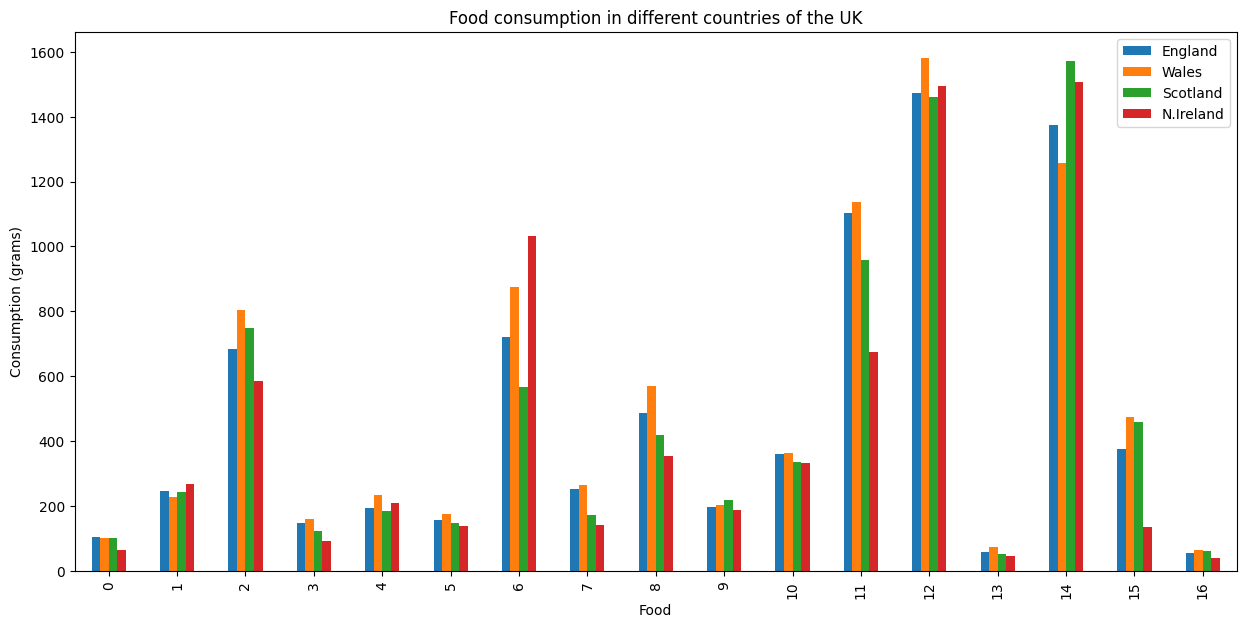

In [178]:
ax = df.plot(kind='bar', figsize=(15,7))
plt.title('Food consumption in different countries of the UK')
plt.xlabel('Food')
plt.ylabel('Consumption (grams)')



In [293]:
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [294]:
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df[df.columns[1:]]))
norm_arr = scaler.fit_transform(df[df.columns[1:]]).T
df_t_norm = norm_df.T

df_t_norm.columns = df['Food']
df_t_norm


Food,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
0,0.035966,0.134697,0.444993,0.065585,0.098025,0.071932,0.469676,0.140339,0.306065,0.101551,0.215797,0.739069,1.000000,0.002116,0.930889,0.226375,0.000000
1,0.025692,0.107378,0.486825,0.063241,0.112648,0.073123,0.533597,0.132411,0.333333,0.091568,0.198287,0.706851,1.000000,0.005929,0.785244,0.270751,0.000000
2,0.032916,0.124424,0.458855,0.045425,0.086241,0.061883,0.337722,0.077683,0.240290,0.109941,0.186965,0.595128,0.927584,0.000000,1.000000,0.266623,0.005925
3,0.017065,0.154266,0.372014,0.035495,0.114676,0.066894,0.677133,0.069625,0.214334,0.099659,0.200000,0.432082,0.991809,0.004096,1.000000,0.064164,0.000000


In [295]:
norm_arr

array([[0.03596615, 0.13469676, 0.44499295, 0.06558533, 0.09802539,
        0.0719323 , 0.4696756 , 0.1403385 , 0.30606488, 0.10155148,
        0.2157969 , 0.73906911, 1.        , 0.00211566, 0.93088858,
        0.22637518, 0.        ],
       [0.0256917 , 0.10737813, 0.48682477, 0.06324111, 0.11264822,
        0.07312253, 0.53359684, 0.13241107, 0.33333333, 0.09156785,
        0.19828722, 0.70685112, 1.        , 0.00592885, 0.78524374,
        0.27075099, 0.        ],
       [0.03291639, 0.12442396, 0.45885451, 0.04542462, 0.08624095,
        0.06188282, 0.33772219, 0.07768269, 0.24028966, 0.10994075,
        0.18696511, 0.59512837, 0.92758394, 0.        , 1.        ,
        0.26662278, 0.00592495],
       [0.01706485, 0.15426621, 0.37201365, 0.03549488, 0.11467577,
        0.0668942 , 0.67713311, 0.06962457, 0.21433447, 0.0996587 ,
        0.2       , 0.43208191, 0.99180887, 0.00409556, 1.        ,
        0.06416382, 0.        ]])

In [340]:
codificador = Sequential()
codificador.add(Dense(units=10,
                      activation='linear',
                      input_shape = [17]))
codificador.add(Dense(units=5,
                        activation='relu'))
codificador.add(Dense(units=2,
                        activation='relu'))

In [341]:
decodificador = Sequential()
decodificador.add(Dense(units=5,
                        activation='relu',
                        input_shape=[2]))
decodificador.add(Dense(units=10,
                        activation='relu'))
decodificador.add(Dense(units=17,
                        activation='linear'))

In [342]:
#codificador = Sequential()
#codificador.add(Dense(2, activation='relu', input_shape = [17]))
#codificador.add(Dense(units=2, activation='relu'))
#
#decodificador = Sequential()
#decodificador.add(Dense(units = 17,
#                        activation = 'relu',
#                        input_shape = [2]))

In [343]:
autocodificador = Sequential([codificador,
                              decodificador])

In [344]:
autocodificador.compile(loss = "mse",
                        optimizer = SGD(learning_rate = 1.5), metrics=['Accuracy'])

In [345]:
autocodificador.fit(norm_arr,
                    norm_arr,
                    epochs = 10)

Epoch 1/10


1/1 [==============================] - 1s 729ms/step - loss: 0.1718 - Accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 0.1174 - Accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 0.0806 - Accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 0.0556 - Accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 0.0387 - Accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 0.0272 - Accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 0.0194 - Accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 0.0141 - Accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0106 - Accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0081 - Accuracy: 0.5000


In [346]:
codificado_2dim = codificador.predict(norm_arr)

1/1 [==============================] - 0s 78ms/step


In [347]:
codificado_2dim.shape

(4, 2)

In [348]:
codificado_2dim

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)